In [ ]:
!pip install pyspark

In [ ]:
!pip install findspark

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
from pyspark.sql.functions import avg
from pyspark.sql.functions import split, explode, avg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
data = spark.read.csv(
    '/content/drive/MyDrive/Colab Notebooks/amazon.csv',
    inferSchema=True, header=True)

In [ ]:
data.printSchema()
data.show(5)


root
 |-- product_id: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- discounted_price: string (nullable = true)
 |-- actual_price: string (nullable = true)
 |-- discount_percentage: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- rating_count: string (nullable = true)
 |-- about_product: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_title: string (nullable = true)
 |-- review_content: string (nullable = true)
 |-- img_link: string (nullable = true)
 |-- product_link: string (nullable = true)

+----------+--------------------+--------------------+----------------+------------+-------------------+------+------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|product_

In [ ]:
data.dtypes

[('product_id', 'string'),
 ('product_name', 'string'),
 ('category', 'string'),
 ('discounted_price', 'string'),
 ('actual_price', 'string'),
 ('discount_percentage', 'string'),
 ('rating', 'string'),
 ('rating_count', 'string'),
 ('about_product', 'string'),
 ('user_id', 'string'),
 ('user_name', 'string'),
 ('review_id', 'string'),
 ('review_title', 'string'),
 ('review_content', 'string'),
 ('img_link', 'string'),
 ('product_link', 'string')]

In [ ]:


#группируем данные по категориям и считаем средний рейтинг
category_avg_rating = data.groupBy("Category").agg(avg("Rating").alias("Average_Rating") )
category_avg_rating.orderBy("Average_Rating", ascending=False).show()

+--------------------+------------------+
|            Category|    Average_Rating|
+--------------------+------------------+
|             Tablets|               4.6|
|          Projectors|               4.5|
|              Memory|               4.5|
|MediaStreamingDev...|               4.5|
|                Film|               4.5|
|     SurgeProtectors|               4.5|
|    PowerLANAdapters|               4.5|
|               Basic|               4.5|
|      CordManagement|               4.5|
|    StreamingClients|               4.5|
|    PowerAccessories|               4.5|
|       CoffeePresses|               4.5|
|Maintenance,Upkee...|4.4714285714285715|
|           AirFryers|              4.46|
|       DeepFatFryers|              4.46|
|   OfficeElectronics|              4.45|
|   PaintingMaterials|              4.45|
|          Scientific|              4.45|
|         Calculators|              4.45|
|              Paints| 4.433333333333334|
+--------------------+------------

In [ ]:
data.dtypes

[('product_id', 'string'),
 ('product_name', 'string'),
 ('Category', 'string'),
 ('discounted_price', 'string'),
 ('actual_price', 'string'),
 ('discount_percentage', 'string'),
 ('rating', 'double'),
 ('rating_count', 'string'),
 ('about_product', 'string'),
 ('user_id', 'string'),
 ('user_name', 'string'),
 ('review_id', 'string'),
 ('review_title', 'string'),
 ('review_content', 'string'),
 ('img_link', 'string'),
 ('product_link', 'string')]

In [60]:
# разделяем категории на отдельные строки
data = data.withColumn("Category", explode(split(trim(col("category")), "\|")))

# регистрация временной таблицы
data.createOrReplaceTempView("amazon_data")

query = """
WITH exploded_categories AS (
    SELECT
        TRIM(Category) AS Category,
        rating
    FROM amazon_data
)
SELECT
    Category,
    ROUND(AVG(rating), 2) AS Average_Rating
FROM exploded_categories
GROUP BY Category
ORDER BY Average_Rating DESC
"""


category_avg_rating_sql.show()

+--------------------+--------------+
|            Category|Average_Rating|
+--------------------+--------------+
|             Tablets|           4.6|
|          Projectors|           4.5|
|              Memory|           4.5|
|MediaStreamingDev...|           4.5|
|     SurgeProtectors|           4.5|
|                Film|           4.5|
|    PowerAccessories|           4.5|
|    PowerLANAdapters|           4.5|
|               Basic|           4.5|
|      CordManagement|           4.5|
|    StreamingClients|           4.5|
|       CoffeePresses|           4.5|
|Maintenance,Upkee...|          4.47|
|           AirFryers|          4.46|
|       DeepFatFryers|          4.46|
|   OfficeElectronics|          4.45|
|   PaintingMaterials|          4.45|
|          Scientific|          4.45|
|         Calculators|          4.45|
|              Paints|          4.43|
+--------------------+--------------+
only showing top 20 rows



In [ ]:


# Преобразование столбца "rating" в числовой формат
data = data.withColumn("rating", data["rating"].cast("float"))

In [ ]:
import matplotlib.pyplot as plt

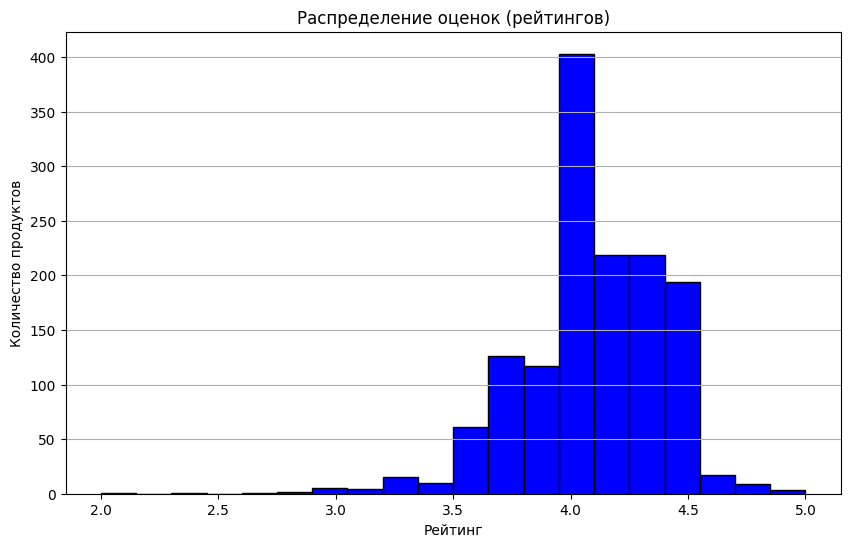

In [ ]:
import matplotlib.pyplot as plt

#берем столбец rating
ratings = data.select("rating")

# преобразуем данные из Spark в Pandas
ratings_pd = ratings.toPandas()

plt.figure(figsize=(10, 6))
plt.hist(ratings_pd["rating"], bins=20, color="blue",edgecolor="black")
plt.title("Распределение оценок (рейтингов)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продуктов")
plt.grid(axis="y")
plt.show()



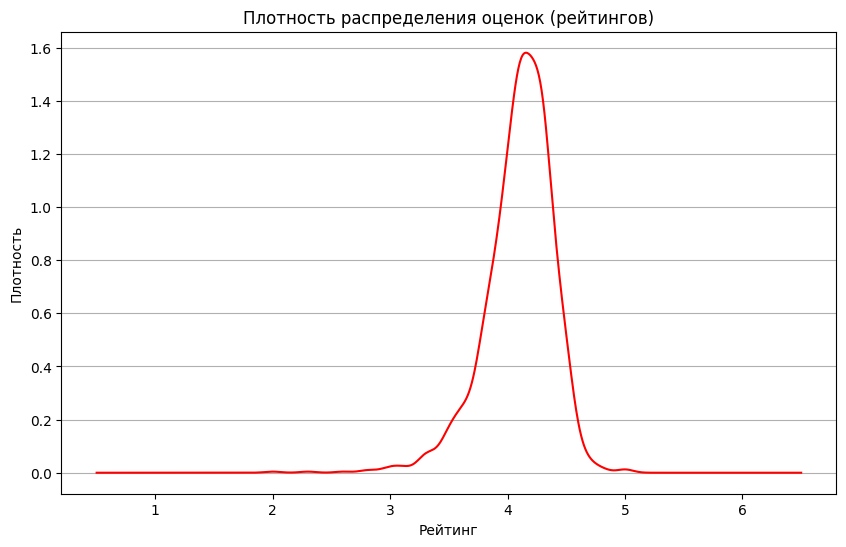

In [ ]:
# Построение графика плотности
plt.figure(figsize=(10, 6))
ratings_pd["rating"].plot(kind="density", color="red")
plt.title("Плотность распределения оценок (рейтингов)")
plt.xlabel("Рейтинг")
plt.ylabel("Плотность")
plt.grid(axis="y")
plt.show()

In [ ]:
from pyspark.sql.functions import split, explode

# Разделяем категории на список и создаем новую строку для каждой категории
data = data.withColumn("Categories", split(data["category"], "\|"))
data = data.withColumn("Category", explode(data["Categories"]))

+--------------------+--------------+
|            Category|Average_Rating|
+--------------------+--------------+
|             Tablets|           4.6|
|          Projectors|           4.5|
|              Memory|           4.5|
|MediaStreamingDev...|           4.5|
|     SurgeProtectors|           4.5|
|                Film|           4.5|
|    PowerAccessories|           4.5|
|    PowerLANAdapters|           4.5|
|               Basic|           4.5|
|      CordManagement|           4.5|
|    StreamingClients|           4.5|
|       CoffeePresses|           4.5|
|Maintenance,Upkee...|          4.47|
|           AirFryers|          4.46|
|       DeepFatFryers|          4.46|
|   OfficeElectronics|          4.45|
|   PaintingMaterials|          4.45|
|          Scientific|          4.45|
|         Calculators|          4.45|
|              Paints|          4.43|
+--------------------+--------------+
only showing top 20 rows

